In [1]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import label_binarize

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,multilabel_confusion_matrix,roc_auc_score,roc_curve,auc,ConfusionMatrixDisplay,precision_score,recall_score

In [2]:
x_train_all=pd.read_csv("CompleteDataSet/x_train_all.csv")
y_train_all=pd.read_csv("CompleteDataSet/y_train_all.csv")
x_test_all=pd.read_csv("CompleteDataSet/x_test_all.csv")
y_test_all=pd.read_csv("CompleteDataSet/y_test_all.csv")

### Metrics

In [3]:
def metric(Y_test,predicted):   
    # accuracy = accuracy_score(Y_test,predicted )
    f1 = f1_score(predicted, Y_test, average="weighted")
    conf_matrix = confusion_matrix(predicted, Y_test)
    precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(Y_test, predicted, average="weighted")

    # Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
    # roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

    conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    fpr = (fp/(tn + fp), tp + fn)
    tnr = (tn/(tn + fp), tp + fn)

    # fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())


    # auc_val = auc(fpr, tpr)
    # plt.figure()
    # plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % auc_val)
    # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('ROC Curve')
    # plt.legend(loc="lower right")
    # plt.show()

    # out=ConfusionMatrixDisplay(conf_matrix,display_labels=gnb.classes_)
    # out.plot()
    # plt.show()
    # print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    print("Specificity:", tnr)
    print("False Positive Rate:", fpr)
    # print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)


In [4]:
def _nanaverage(a, weights=None):
    """Compute the weighted average, ignoring NaNs.

    Parameters
    ----------
    a : ndarray
        Array containing data to be averaged.
    weights : array-like, default=None
        An array of weights associated with the values in a. Each value in a
        contributes to the average according to its associated weight. The
        weights array can either be 1-D of the same shape as a. If weights=None,
        then all data in a are assumed to have a weight equal to one.

    Returns
    -------
    weighted_average : float
        The weighted average.

    Notes
    -----
    This wrapper to combine :func:numpy.average and :func:numpy.nanmean, so
    that :func:np.nan values are ignored from the average and weights can
    be passed. Note that when possible, we delegate to the prime methods.
    """

    if len(a) == 0:
        return np.nan

    mask = np.isnan(a)
    if mask.all():
        return np.nan

    if weights is None:
        return np.nanmean(a)

    weights = np.array(weights, copy=False)
    a, weights = a[~mask], weights[~mask]
    try:
        return np.average(a, weights=weights)
    except ZeroDivisionError:
        # this is when all weights are zero, then ignore them
        return np.average(a)

### Cross Validation

In [5]:
from sklearn.model_selection import KFold 
# from sklearn.utils.extmath import _nanaverage

In [8]:
#function that performs 10-fold cross validation
def kfold_10(input,output,splits=10):
    kf = KFold(n_splits=splits,shuffle=True,random_state=42) #initializing the kfold with 10 splits
    #lists to store the evaluation metrics
    accuracy_scores = [] 
    prec_scores = []
    roc_scores=[]
    f1_scores = []
    recall_scores=[]
    #loop to iterate over the folds
    for train_index, test_index in kf.split(input):
        dt_classifier = DecisionTreeClassifier() #initializing the tree

        #priting the lengths of each index
        print("Train:", len( train_index), "Validation:",len(test_index))
        X_train, X_test = input.iloc[train_index], input.iloc[test_index] 
        y_train, y_test = output.iloc[train_index], output.iloc[test_index]
        #train the decision tree model
        dt_classifier.fit(X_train, y_train)
        #predict on the x_test data
        pred=dt_classifier.predict(X_test)
        # predicted_probs=dt_classifier.predict_proba(X_test)
        #finding the values for the various evaluation metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average="weighted",zero_division=1)
        f1 = f1_score( y_test,pred, average="weighted")
        recall = recall_score( y_test, pred, average="weighted")
        # Y_test_bin = label_binarize( y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
        # roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")
        # fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())
        # auc_val=auc(fpr, tpr)

        # conf_matrices = multilabel_confusion_matrix(y_test, pred)
        conf_matrix = confusion_matrix(y_test, pred)
        print("Confusion Matrix:\n", conf_matrix)
        # tp = conf_matrices[:,1,1]
        # fp = conf_matrices[:,0,1]
        # tn = conf_matrices[:,0,0]
        # fn = conf_matrices[:,1,0]
        # auc_scores.append(auc_val)
        # roc_scores.append(roc)
        f1_scores.append(f1)
        recall_scores.append(recall)
        prec_scores.append(precision)
        accuracy_scores.append(accuracy)
        # fpr = fp/(tn + fp)
        # tnr = tn/(tn + fp)
        # tps.append(tnr)
        # fps.append(fpr)
   
    avg_roc=sum(roc_scores)/10
    avg_f1=sum(f1_scores)/10
    avg_f1=sum(f1_scores)/10
    avg_recall=sum(recall_scores)/10
    avg_prec=sum(prec_scores)/10
    average_accuracy = sum(accuracy_scores) / 10
      
   
    # avg_auc=sum(auc_scores)/10
    # plt.figure()
    # plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % avg_auc)
    # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('ROC Curve')
    # plt.legend(loc="lower right")
    # plt.show()
    # tp_avg=sum(tps)
    # fp_avg=sum(fps)
    # print("roc_avg",avg_roc)
    # print("Average tpr",tp_avg)
    # print("Average fpr",fp_avg)
    # printing the final values
    print(f"Average Accuracy: {average_accuracy}")
    print(f"Average Precision: {avg_prec}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1: {avg_f1}")





In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

def learn_curve(inp,lab):
    dt_classifier = DecisionTreeClassifier()

    train_sizes, train_scores, val_scores = learning_curve(
        dt_classifier, inp, lab, cv=KFold(n_splits=10,shuffle=True), 
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="green")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                    val_scores_mean + val_scores_std, alpha=0.1, color="red")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="red", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Cross-validation score")

    plt.title("Decision Tree Learning Curve")
    plt.xlabel("Number of training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.show()


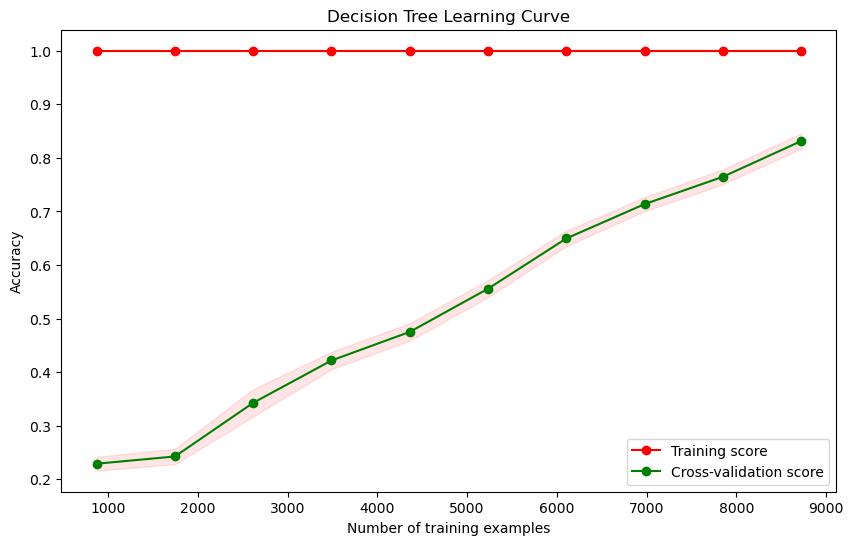

In [12]:
learn_curve(x_train_all,y_train_all)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(input_data, labels):
    dt_classifier = DecisionTreeClassifier()

    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores, val_scores = [], []

    for size in train_sizes:
        sample_size = int(len(input_data) * size)
        train_score = np.mean(cross_val_score(dt_classifier, input_data[:sample_size], labels[:sample_size], cv=10))
        train_scores.append(train_score)
        val_score = np.mean(cross_val_score(dt_classifier, input_data, labels, cv=10))
        val_scores.append(val_score)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes * len(input_data), train_scores, 'o-', color="red", label="Training score")
    plt.plot(train_sizes * len(input_data), val_scores, 'o-', color="green", label="Cross-validation score")

    plt.title("Decision Tree Learning Curve")
    plt.xlabel("Number of training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.show()

    print("Average Training Score:", sum(train_scores)/10 )
    print("Average Cross-Validation Score:",sum(val_scores)/10)

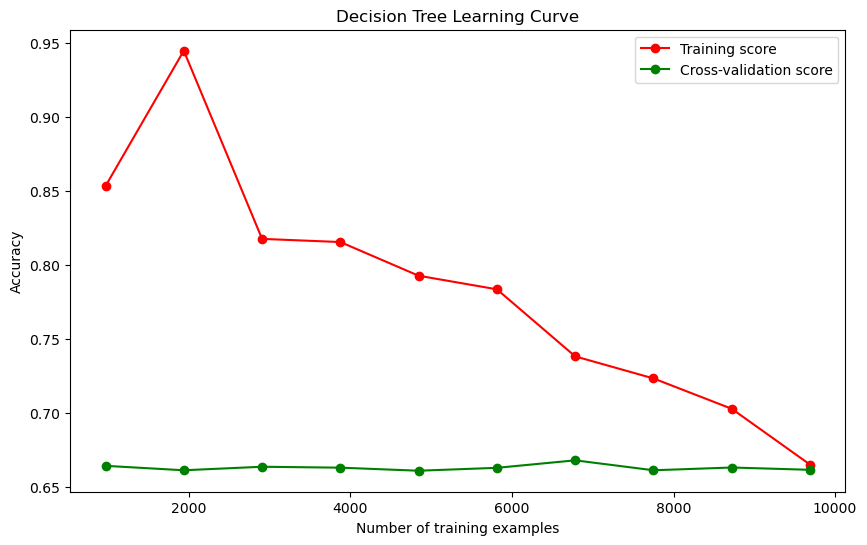

Average Training Score: 0.7837782859553653
Average Cross-Validation Score: 0.6631372549019607


In [4]:
plot_learning_curve(x_train_all,y_train_all)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(input_data, labels):
    dt_classifier = DecisionTreeClassifier()

    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores, val_scores = [], []

    for size in train_sizes:
        sample_size = int(len(input_data) * size)
        train_score = np.mean(cross_val_score(dt_classifier, input_data[:sample_size], labels[:sample_size], cv=10))
        train_scores.append(train_score)
        val_score = np.mean(cross_val_score(dt_classifier, input_data, labels, cv=10))
        val_scores.append(val_score)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes * len(input_data), train_scores, 'o-', color="red", label="Training score")
    plt.plot(train_sizes * len(input_data), val_scores, 'o-', color="green", label="Cross-validation score")

    plt.title("Decision Tree Learning Curve")
    plt.xlabel("Number of training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.show()

    print("Average Training Score:", sum(train_scores)/10 )
    print("Average Cross-Validation Score:",sum(val_scores)/10)

In [7]:
x_train_all.shape

(9690, 2304)

In [8]:
y_train_all.shape

(9690, 1)

In [9]:
kfold_10(x_train_all,y_train_all)

Train: 8721 Validation: 969
Confusion Matrix:
 [[ 20   1   4   1   0   0   0   0   0   1]
 [  5 184  14   3   9   1   0   3   1   1]
 [  1  15 192   9   5   0   1   1   2   2]
 [  1   1   9 126   3   0   0   1   1   0]
 [  1  12   4   0 178   0   0   1   1   1]
 [  0   1   4   0   0  18   0   2   1   2]
 [  1   0   0   0   4   0  28   0   1   0]
 [  0   2   0   1   1   1   1  18   0   1]
 [  1   0   2   1   0   0   1   0  31   1]
 [  1   2   2   1   0   1   0   0   1  21]]
Train: 8721 Validation: 969
Confusion Matrix:
 [[ 14   1   3   0   1   0   0   0   0   0]
 [  5 188  12   3  15   1   1   3   0   2]
 [  1  17 194   6   7   0   1   2   1   0]
 [  0   5   7 131   1   0   1   0   1   0]
 [  2   9   8   3 168   0   2   0   1   1]
 [  0   0   0   0   1  13   0   1   0   1]
 [  0   0   1   3   0   0  29   0   1   1]
 [  1   0   0   1   2   1   1  15   0   1]
 [  1   1   1   1   0   2   1   0  47   0]
 [  0   3   3   0   0   1   1   0   0  16]]
Train: 8721 Validation: 969
Confusion Matrix

In [10]:
#function that uses the train test split data
def train_test_split(X_train,X_test,y_test,y_train):
    dt_classifier = DecisionTreeClassifier()#initializing the tree 
    dt_classifier.fit(X_train,y_train)# fitting the tree 
    predicted=dt_classifier.predict(X_test)# predicting the values
    #finding the probability predictions
    predicted_probs = dt_classifier.predict_proba(X_test)
    
    #finding the accuracy
    accuracy = accuracy_score(y_test,predicted )
    #finding the f1
    f1 = f1_score(predicted, y_test, average="weighted")
    #finding the confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted)
    #finding the precision
    precision = precision_score(y_test, predicted, average="weighted",zero_division=1)
    #finding the recall
    recall = recall_score(y_test, predicted, average="weighted")
    #finding the roc
    Y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
    roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

    fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())
    #plotiing the AUC graph
    auc_val = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % auc_val)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    #plotting the confusion matrix 
    out=ConfusionMatrixDisplay(conf_matrix,display_labels=dt_classifier.classes_)
    out.plot()
    plt.show()
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    print("False Positive Rate:", fpr)
    print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)


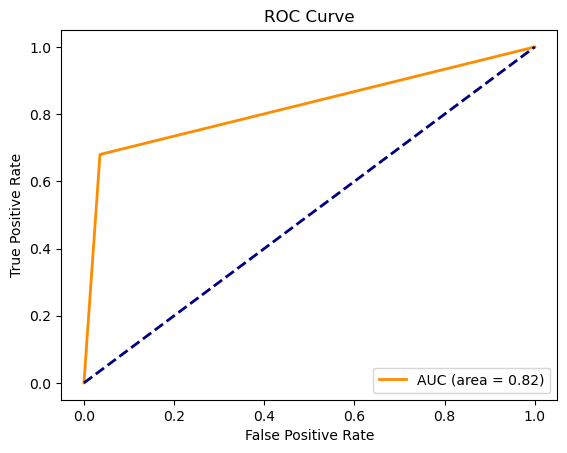

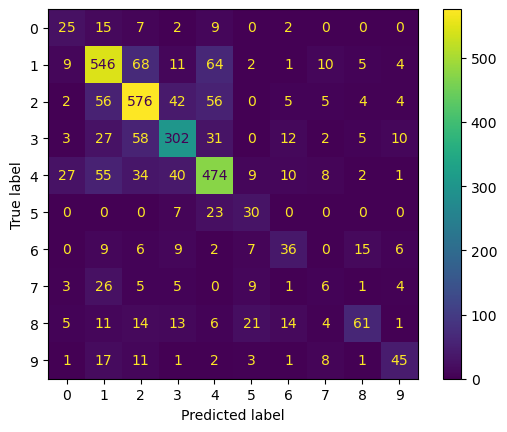

Accuracy: 0.6799352750809061
F1 Score: 0.682920979632166
Precision: 0.6781612921743321
Recall/Sensitivity/True Positive Rate: 0.6799352750809061
False Positive Rate: [0.         0.03556275 1.        ]
Area under ROC curve: 0.8056699763008277
Confusion Matrix:
 [[ 25  15   7   2   9   0   2   0   0   0]
 [  9 546  68  11  64   2   1  10   5   4]
 [  2  56 576  42  56   0   5   5   4   4]
 [  3  27  58 302  31   0  12   2   5  10]
 [ 27  55  34  40 474   9  10   8   2   1]
 [  0   0   0   7  23  30   0   0   0   0]
 [  0   9   6   9   2   7  36   0  15   6]
 [  3  26   5   5   0   9   1   6   1   4]
 [  5  11  14  13   6  21  14   4  61   1]
 [  1  17  11   1   2   3   1   8   1  45]]


In [11]:
train_test_split(x_train_all,x_test_all,y_test_all,y_train_all)